# ISF 2a, 2b and 2c: comparison between in-house and public dataset on glycochenodeoxycholic acid
## Workflow
1. Get the retention time from asari viz panel.
2. Extract from cmap to get the mapped scan number.
3. Using pyopenms to get the mass spectrum from mzML file. 

In [1]:
import os
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
import pyopenms as oms

Determination of memory status is not supported on this 
 platform, measuring for memoryleaks will never fail


## Inhouse 

In [2]:
import pickle
cmap = pickle.load(open('./inhouse_asari_project_32113333/export/cmap.pickle', 'rb'))
rt2scan_num = {v: k for k, v in cmap['dict_scan_rtime'].items()}
rt2scan_num[157.36030200000002]

1193

In [3]:
exp = oms.MSExperiment()
oms.MzMLFile().load("./Bile_Acid_In_source_fragmentation/inhouse/Bile_Acid_STD_HILICpos.mzML", exp)
mz, intensity = exp[1193].get_peaks()
# log_transformed_intensity = np.log10(intensity)
normalized_intensity = (intensity - np.min(intensity)) / (np.max(intensity) - np.min(intensity)) * 100
target_values = np.array([472.3033, 473.3065, 474.3085, 450.3203, 451.3236, 452.3264, 432.3098, 433.3132, 434.3162, 414.2993, 415.3027, 416.3054])
condition = np.any([abs((mz - target) / mz) <= 5e-6 for target in target_values], axis=0)

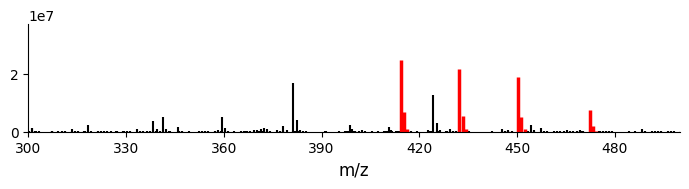

In [7]:
target_mz_values = mz[condition]
target_intensities = intensity[condition]

mz_values = mz[~condition]
intensities = intensity[~condition]

plt.figure(figsize=(7, 2))
stems1 = plt.stem(mz_values, intensities, basefmt=" ", markerfmt=" ", linefmt="#000", bottom=0.01)
stems1.stemlines.set_linewidth(1.5)
stems2 = plt.stem(target_mz_values, target_intensities, basefmt=" ", markerfmt=" ", linefmt="red", bottom=0.01)
stems2.stemlines.set_linewidth(2.5)
# Set x-axis range
plt.xlim(300, 500)
plt.ylim(0, max(max(intensities), max(target_intensities)) * 1.1)


ax = plt.gca()
ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("m/z", fontsize=12)
plt.xticks(np.arange(300, 500, 30))
# plt.yticks([])
plt.grid(False)
plt.tight_layout()
plt.savefig('2b_inhouse_bile_acid.pdf')

## Public

### Use mzML file

In [5]:
import pickle
cmap = pickle.load(open('/Users/chiy/Projects/computational/in_source_fragments_serum/analysis_publish/fig_for_pub/2_4/2a_2b_2c/public_asari_project_32113438/export/cmap.pickle', 'rb'))
rt2scan_num = {v: k for k, v in cmap['dict_scan_rtime'].items()}
rt2scan_num[616.1707200000001]

1770

In [6]:
exp = oms.MSExperiment()
oms.MzMLFile().load("./Bile_Acid_In_source_fragmentation/public/214.mzML", exp)

mz, intensity = exp[1770].get_peaks()
# log_transformed_intensity = np.log10(intensity)
normalized_intensity = (intensity - np.min(intensity)) / (np.max(intensity) - np.min(intensity)) * 100
target_values = np.array([472.3033, 473.3065, 474.3085, 450.3203, 451.3236, 452.3264, 432.3098, 433.3132, 434.3162, 414.2993, 415.3027, 416.3054])
condition = np.any([abs((mz - target) / mz) <= 5e-6 for target in target_values], axis=0)

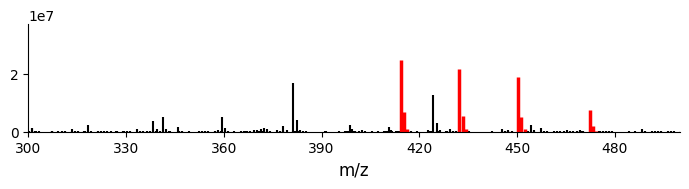

In [9]:
target_mz_values = mz[condition]
target_intensities = intensity[condition]

mz_values = mz[~condition]
intensities = intensity[~condition]

plt.figure(figsize=(7, 2))
stems1 = plt.stem(mz_values, intensities, basefmt=" ", markerfmt=" ", linefmt="#000", bottom=0.01)
stems1.stemlines.set_linewidth(1.5)
stems2 = plt.stem(target_mz_values, target_intensities, basefmt=" ", markerfmt=" ", linefmt="red", bottom=0.01)
stems2.stemlines.set_linewidth(2.5)
# Set x-axis range
plt.xlim(300, 500)
plt.ylim(0, max(max(intensities), max(target_intensities)) * 1.1)


ax = plt.gca()
ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("m/z", fontsize=12)
plt.xticks(np.arange(300, 500, 30))
# plt.yticks([])
plt.grid(False)
plt.tight_layout()
plt.savefig('2a_public_bile_acid.pdf')

## Plot Public Mass Tracks

In [10]:
import pickle
cmap = pickle.load(open('./public_asari_project_32113438/export/cmap.pickle', 'rb'))

In [11]:

def plot_mass_track(x, y, filename):
    plt.figure(figsize=(7, 1.2))
    plt.scatter(x, y, s=2, color='black')
    plt.xlabel('rtime', fontsize=12)
    # plt.ylabel('Intensity', fontsize=12)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.tight_layout()
    plt.savefig(filename)

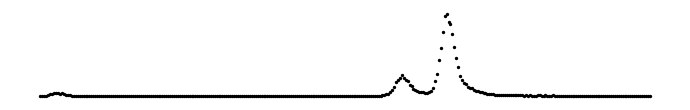

In [15]:
arr_x = np.array(list(cmap['dict_scan_rtime'].values()))
indices = np.where((arr_x > 550) & (arr_x < 650))[0]
y = cmap['list_mass_tracks'][7858]['intensity'][indices]
x = arr_x[indices]
plot_mass_track(x, y, '2c_450_3203.pdf')

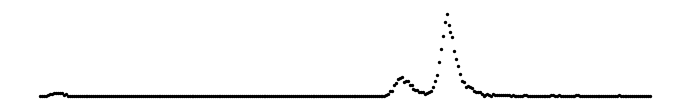

In [16]:
y = cmap['list_mass_tracks'][7866]['intensity'][indices]
x = arr_x[indices]
plot_mass_track(x, y, '2c_451_323.pdf')

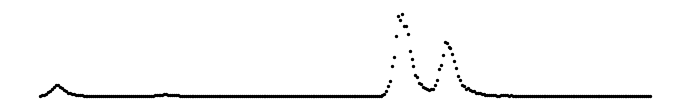

In [17]:
y = cmap['list_mass_tracks'][8075]['intensity'][indices]
x = arr_x[indices]
plot_mass_track(x, y, '2c_472_3022.pdf')